In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADYEY', 'AMD', 'AMZN', 'ANET', 'APPH',
    'AXON', 'BROS', 'BYND', 'CHWY', 'COIN', 'COUR', 'CRWD', 'DDOG',
    'DKNG', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT',
    'FUV', 'FVRR', 'GH', 'GMED', 'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD',
    'LULU', 'MDB', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA',
    'NYT', 'OKTA', 'OPEN', 'PANW', 'PINS', 'PTON', 'QDEL', 'RBLX',
    'RDFN', 'RGEN', 'ROKU', 'RVLV', 'SE', 'SHOP', 'SNOW', 'SPLK', 'SQ',
    'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR',
    'UPST', 'VEEV', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

72

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-04-30', datetime.date(2022, 4, 30))

In [15]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  75 of 75 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADYEY
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCS
   ...DOCU
   ...DUOL
   ...DVN
   ...EDIT
   ...ETSY
   ...FLGT
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...ROKU
   ...RVLV
   ...SE
   ...SHOP
   ...SNOW
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [16]:
data['Date'].tail()

2513   2022-04-25
2514   2022-04-26
2515   2022-04-27
2516   2022-04-28
2517   2022-04-29
Name: Date, dtype: datetime64[ns]

In [43]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.005658
2       0.997503
3       0.992341
4       0.983853
5       1.000351
          ...   
2513    1.005698
2514    0.971854
2515    1.002098
2516    1.024747
2517    0.963715
Name: ^GSPC, Length: 2517, dtype: float64

In [44]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.017692
2,1.017481
3,1.002184
4,0.985515
5,1.014706
...,...
2513,1.044177
2514,0.962634
2515,1.002723
2516,1.049715


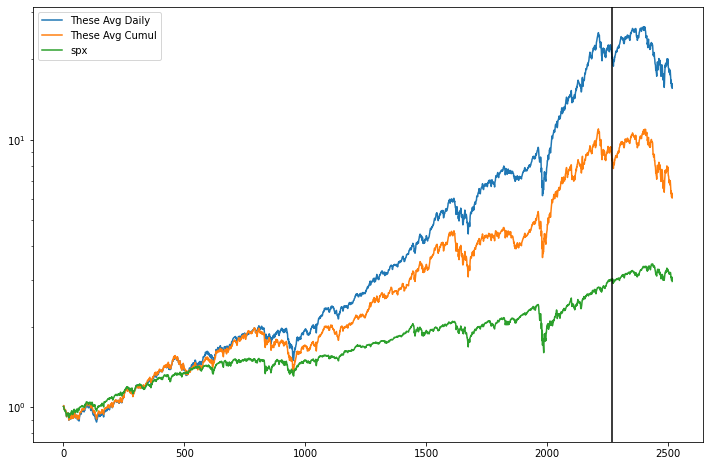

In [45]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [46]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-04-30,NaN,NaN
1,2012-05-01,1.009754,1.009754
2,2012-05-02,1.014713,1.014748
3,2012-05-03,1.004067,1.004131
4,2012-05-04,0.985660,0.985526


In [47]:
out.tail()

,Date,mine1,mine2
2513,2022-04-25,16.714291,6.437710
2514,2022-04-26,15.886099,6.124090
2515,2022-04-27,15.794434,6.112667
2516,2022-04-28,16.229989,6.322027
2517,2022-04-29,15.590396,6.067311


In [48]:
!ls ../data

dev_quantiles.csv    myHistoricTest.RData scoring.csv
historic.csv         nasdaq1965.csv       sp1950.csv
mine.csv             nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params


In [49]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

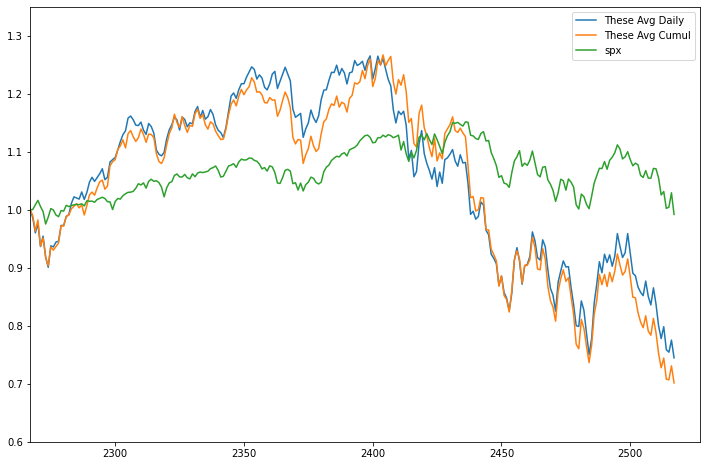

In [50]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.6, 1.35)
plt.legend();

In [51]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [52]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1379,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
1380,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
1381,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
1382,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
1383,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [53]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1379,16.26,16.26,16.990,14.00
1380,15.26,15.26,16.399,15.12
1381,15.24,15.24,15.860,14.77
1382,13.73,13.73,15.430,13.62
1383,14.02,14.02,14.160,13.81


In [54]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1379,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
1380,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
1381,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
1382,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
1383,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.990279
Name: HighMult, dtype: float64


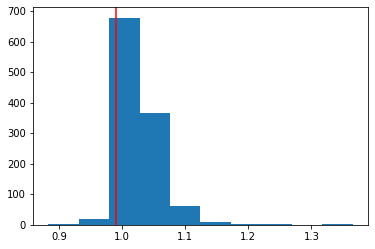

In [29]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0140510700895053


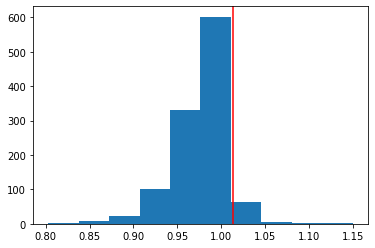

In [30]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [31]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [32]:
get_hilo_mult(rblx)

(1.0140510700895053, 0.9902793014583757)

In [33]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0081245098175693, 0.9942778673326276)

In [34]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [35]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1379,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
1380,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
1381,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
1382,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
1383,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [36]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [37]:
get_hilo_mults(rblx)

(1.0110151161106866,
 0.9915441777806593,
 1.0174909304081967,
 0.9879597764860499)

In [38]:
get_hilo_mults(aapl)

(1.006104846545345, 0.9956874322968432, 1.0095290299060347, 0.9928829715278568)

In [39]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006105,0.995687,1.009529,0.992883
1,ABMD,1.003975,0.997234,1.004749,0.996994
2,ABNB,1.006000,0.994581,1.011443,0.987714
3,ADYEY,1.023536,0.982225,1.028847,0.966960
4,AMD,1.011565,0.992862,1.011093,0.991110


In [40]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,157.649994,AAPL
ABMD,286.579987,ABMD
ABNB,153.210007,ABNB
ADYEY,16.67,ADYEY
AMD,85.519997,AMD
...,...,...
ZEN,122.040001,ZEN
ZNGA,8.27,ZNGA
^GSPC,4131.930176,^GSPC
^IXIC,12334.639648,^IXIC


In [41]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006105,0.995687,1.009529,0.992883,157.649994
1,ABMD,1.003975,0.997234,1.004749,0.996994,286.579987
2,ABNB,1.006000,0.994581,1.011443,0.987714,153.210007
3,ADYEY,1.023536,0.982225,1.028847,0.966960,16.67
4,AMD,1.011565,0.992862,1.011093,0.991110,85.519997


In [42]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv